In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data
Lets start reading in the titanic_train.csv file into a pandas dataframe

In [2]:
titanic=pd.read_csv('D:\shru\SEM 5\ML\\titanic.csv')

In [3]:
titanic.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Gender       418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Missing Data


In [5]:
titanic.isnull()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


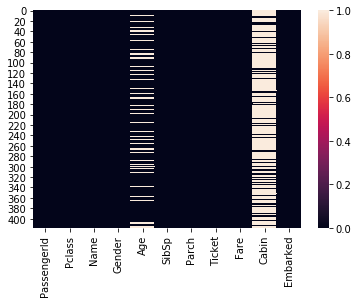

In [6]:
sns.heatmap(titanic.isnull())

# Emploratory Data 

# Missing Data
We can use seaborn to create a sinple heatmap to see where we are missing data!

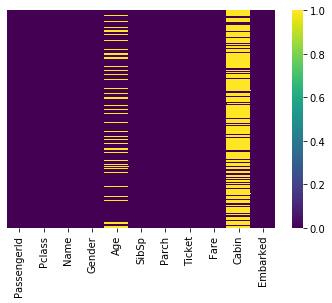

In [8]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=True,cmap='viridis')

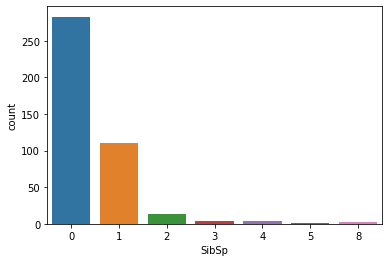

In [9]:
sns.countplot(x='SibSp',data=titanic)

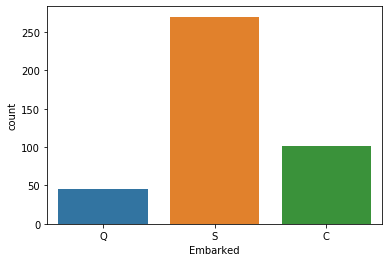

In [10]:
#gives how many times it gt repeated
sns.countplot(x='Embarked',data=titanic)

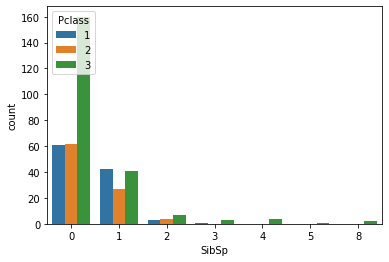

In [11]:
sns.countplot(x='SibSp',hue='Pclass',data=titanic)

In [12]:
titanic['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

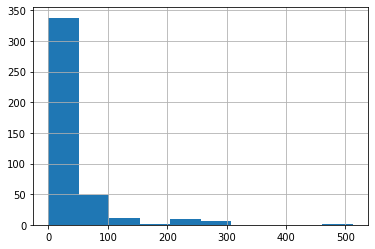

In [13]:
titanic['Fare'].hist()

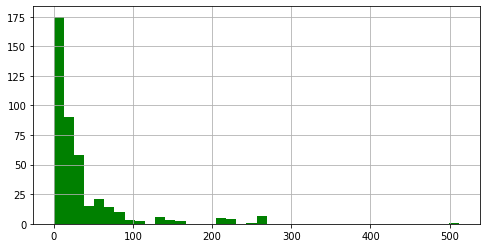

In [15]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning
Fill missing data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengeres(imputation). However we can be smarter about this and check the average age by passenger class

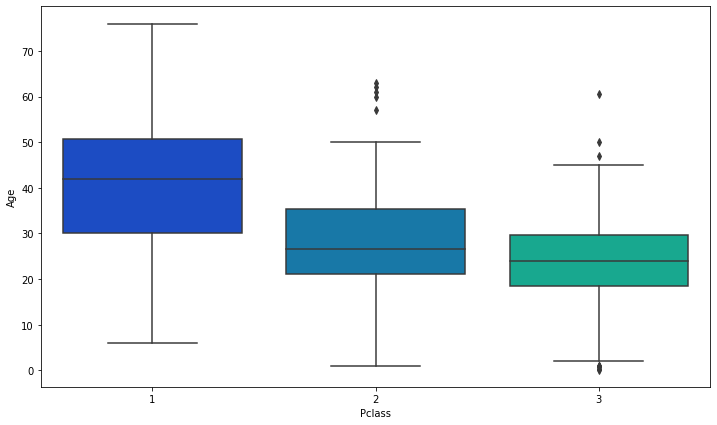

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [19]:
titanic.groupby('Pclass').mean()['Age']

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

can see the weathier passenfers in the higher classes tend to b older , which makes sense. can use these average age values to impulse based on Pclass for Age. 

In [20]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 41
        
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

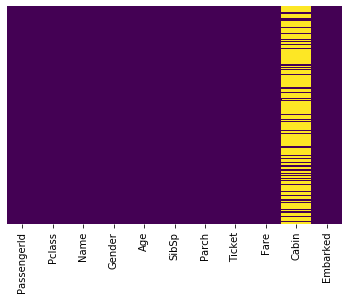

In [22]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
titanic.drop('Cabin',axis=1,inplace=True)

In [33]:
titanic.dropna(inplace=True)

In [34]:
titanic.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Gender       417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


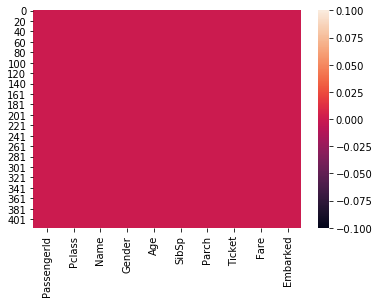

In [35]:
sns.heatmap(titanic.isnull())

In [36]:
gender=pd.get_dummies(titanic['Gender'],drop_first=False)

In [37]:
embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [38]:
titanic.drop(['Gender','Name','Embarked','Ticket'],axis=1,inplace=True)

In [39]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [40]:
titanic=pd.concat([titanic,gender,embarked],axis=1)

In [41]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1
